## Run Model



In [1]:
# Dependences
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Experiments
from model import run
from model.parts.utils import *
from model.plot_utils import *

pd.options.display.float_format = '{:.2f}'.format

%matplotlib inline

df = run.run()
rdf = run.postprocessing(df)
# rdf = df # debugging substeps


running file: run.py
running file: asset_utils.py
end of file: asset_utils.py
running file: sim_setup.py
end of file: sim_setup.py
end of file: run.py

                  ___________    ____
  ________ __ ___/ / ____/   |  / __ \
 / ___/ __` / __  / /   / /| | / / / /
/ /__/ /_/ / /_/ / /___/ ___ |/ /_/ /
\___/\__,_/\__,_/\____/_/  |_/_____/
by cadCAD

Execution Mode: local_proc
Configuration Count: 1
Dimensions of the first simulation: (Timesteps, Params, Runs, Vars) = (100, 15, 3, 24)
Execution Method: local_simulations
SimIDs   : [0, 0, 0]
SubsetIDs: [0, 1, 2]
Ns       : [0, 1, 2]
ExpIDs   : [0, 0, 0]
Execution Mode: parallelized
 R to R swap called 
 R added to pool of  i  =  1000
 R removed from pool of  j  =  3962.3210018685786
 R to R swap called 
 R added to pool of  j  =  1000
 R removed from pool of  i  =  253.26919483183883
 R to R swap called 
 R added to pool of  i  =  1000
 R removed from pool of  j  =  3934.528326811269
 R to R swap called 
 R added to pool of  j  =  1000

 R added to pool of  i  =  1000
 R removed from pool of  j  =  3503.7483654585667
 R to R swap called 
 R added to pool of  i  =  1000
 R removed from pool of  j  =  3471.5455214795657
 R to R swap called 
 R added to pool of  j  =  1000
 R removed from pool of  i  =  289.00167382042855
 R to R swap called 
 R added to pool of  i  =  1000
 R removed from pool of  j  =  3448.9186374404235
 R to R swap called 
 R added to pool of  j  =  1000
 R removed from pool of  i  =  290.89205452869646
 R to R swap called 
 R added to pool of  j  =  1000
 R removed from pool of  i  =  290.11789571889676
 R to R swap called 
 R added to pool of  j  =  1000
 R removed from pool of  i  =  289.3468232364394
 R to R swap called 
 R added to pool of  j  =  1000
 R removed from pool of  i  =  288.5788206977304
 R to R swap called 
 R added to pool of  i  =  1000
 R removed from pool of  j  =  3453.957382333232
 R to R swap called 
 R added to pool of  j  =  1000
 R removed from pool of  i  =  290.468947318

 R added to pool of  j  =  1000
 R removed from pool of  i  =  295.0195551114157
 R to R swap called 
 R added to pool of  i  =  1000
 R removed from pool of  j  =  3378.257945780293
 R to R swap called 
 R added to pool of  j  =  1000
 R removed from pool of  i  =  297.00345774763264
 R to R swap called 
 R added to pool of  i  =  1000
 R removed from pool of  j  =  3355.762259936193
 R to R swap called 
 R added to pool of  j  =  1000
 R removed from pool of  i  =  298.98820321820676
 R to R swap called 
 R added to pool of  i  =  1000
 R removed from pool of  j  =  3333.5551427573664
 R to R swap called 
 R added to pool of  i  =  1000
 R removed from pool of  j  =  3302.2594956569374
 R to R swap called 
 R added to pool of  j  =  1000
 R removed from pool of  i  =  303.8171518659219
 R to R swap called 
 R added to pool of  i  =  1000
 R removed from pool of  j  =  3280.7338573740562
 R to R swap called 
 R added to pool of  j  =  1000
 R removed from pool of  i  =  305.8043532001

## Interpretation of Results

### Creation of Results

Before moving to the interpretation and analysis we first create and prepare the results: sometimes just to see whether the experiment is running corectly and sometimes to see into the results for analysis

The following command lines creates views based on the simulation results.

- the `model_history`, counting for the i-th base asset, the risk asset and the shares of the risk asset respectively.
- the `uniswap_j`, counting for the j-th base asset, the risk asset and the shares of the risk asset respectively.,
- the `uniswap_ij` counting for the i-j asset, the risk asset and the shares of the risk asset respectively, and
- `hydra`, counting the base asset amount in the pool, the total base asset supply and the shares of the base asset respectively.



In [2]:
hydra = rdf[['Q', 'H', 'Sq']]
hydra.columns = ['Hydra_Q', 'Hydra_H', 'Hydra_Sq']

### Risk assets in the Omnipool - the `pool` variable 

The `pool` variable is the risk-asset side of the Omnipool in the Hydra world.

For each asset in the Omnipool this variable tracks its quantities:

- $R$ (asset quantity),
- $S$ (share quantity),
- $C$ (coefficient),
- $P$ (price) and 
- $dP$ (change in price).

To locate specific values in the `pool` dataframe 
- `first_valid_index()`
- `first_valid_index()*x`
- `last_valid_index()`

can be used for any integer value $x$.

In [3]:
print(rdf.pool[rdf.first_valid_index()])

<class 'model.parts.v2_asset_utils.V2_Asset'>: {'pool': {'i': {'R': 1001000, 'S': 1000000, 'C': 1, 'P': 3.1908945366041404, 'dP': -0.006065427743461083}, 'j': {'R': 996037.6789981314, 'S': 1000000, 'C': 0.2511886431509577, 'P': 0.8091205642640924, 'dP': 0.006080528611684288}}}


In [4]:
rdf.pool[rdf.first_valid_index()].pool

{'i': {'R': 1001000,
  'S': 1000000,
  'C': 1,
  'P': 3.1908945366041404,
  'dP': -0.006065427743461083},
 'j': {'R': 996037.6789981314,
  'S': 1000000,
  'C': 0.2511886431509577,
  'P': 0.8091205642640924,
  'dP': 0.006080528611684288}}

In [5]:
rdf.pool[rdf.first_valid_index()*10].pool

{'i': {'R': 1055234.8387369604,
  'S': 1049739.6211046795,
  'C': 1.0966171155314,
  'P': 3.165402109618906,
  'dP': -4.440892098500626e-16},
 'j': {'R': 979663.6203059538,
  'S': 1000000,
  'C': 0.2511886431509577,
  'P': 0.8350085721710558,
  'dP': 1.1102230246251565e-16}}

In [6]:
rdf.pool[rdf.last_valid_index()].pool

{'i': {'R': 1025201.2780457742,
  'S': 1000000.0,
  'C': 0.9999999999999999,
  'P': 2.8867602624159097,
  'dP': -0.005922128989417352},
 'j': {'R': 908730.4412132751,
  'S': 1000000,
  'C': 0.2511886431509577,
  'P': 0.934106188583859,
  'dP': 0.006666532711341544}}

### Representing results in table form

In [7]:
rdf.columns


Index(['UNI_Qi', 'UNI_Ri', 'UNI_Si', 'UNI_Qj', 'UNI_Rj', 'UNI_Sj', 'UNI_ij',
       'UNI_ji', 'UNI_Sij', 'uni_agents', 'UNI_P_RQi', 'UNI_P_RQj', 'UNI_P_ij',
       'pool', 'Q', 'H', 'Sq', 'Y', 'hydra_agents', 'C', 'asset_random_choice',
       'trade_random_size', 'trade_random_direction', 'purchased_asset_id',
       'simulation', 'subset', 'run', 'substep', 'timestep'],
      dtype='object')

The simulation results and variable quantities can be shown in table form where

- `head(n)`
- `tail(n)`

can be used to target the $n$ specific entries.

##### The columns show:
##### for the uniswap universe
- `UNI_Qi`...the quantity of the i-th assets base
- `UNI_Ri`...the quantity of the i-th assets risk
- `UNI_Si`...the quantity of the i-th assets shares
- `UNI_Qj`...the quantity of the j-th assets base
- `UNI_Rj`...the quantity of the j-th assets risk
- `UNI_Sj`...the quantity of the j-th assets shares
- `UNI_ij`...the quantity of the ji assets base
- `UNI_ji`...the quantity of the ij assets risk
- `UNI_Sij`...the quantity of the ij assets shares
- `uni_agents`...the definition of the actions of the uniswap agents
- `UNI_P_RQi`...the price of the i-th risk asset in terms of Q
- `UNI_P_RQj`...the price of the j-th risk asset in terms of Q
- `UNI_P_RQj`...the price of the ij risk asset in terms of Q

##### for the hydra universe
- `pool`...the definition of the pool variable
- `Q`...the quantity of the base asset in the hydra pool
- `H`...the total quantity of the base asset in the hydra system
- `Sq`...total quantity of shares of the base asset
- `Y`...the pool constant
- `hydra_agents`...the definition of the actions of the hydra agents

##### for the trades
- `asset_random_choice`...which risk asset is traded in and which out
- `trade_random_size`...the size of the trade
- `trade_random_direction`...the trade action
- `purchased_asset_id`...which asset is purchased

##### simulation parameters
- `simulation`...simulation number
- `subset`...subset number
- `run`...run number
- `substep`...substep number
- `timestep`...timestep of simulation

Notice, that due to postprocessing of the simulation results this table always shows the forth substep of each timestep only.

In [8]:
rdf.tail()

,UNI_Qi,UNI_Ri,UNI_Si,UNI_Qj,UNI_Rj,UNI_Sj,UNI_ij,UNI_ji,UNI_Sij,uni_agents,...,C,asset_random_choice,trade_random_size,trade_random_direction,purchased_asset_id,simulation,subset,run,substep,timestep
890,2000000,1000000,10000,2000000,1000000,10000,1000000,1000000,1000000000000,m r_i_out r_i_in h q_i ...,...,1000000000000,j,1000,test_r_for_r,i,0,2,2,3,96
893,2000000,1000000,10000,2000000,1000000,10000,1000000,1000000,1000000000000,m r_i_out r_i_in h q_i ...,...,1000000000000,i,1000,test_r_for_r,j,0,2,2,3,97
896,2000000,1000000,10000,2000000,1000000,10000,1000000,1000000,1000000000000,m r_i_out r_i_in h q_i ...,...,1000000000000,i,1000,test_r_for_r,j,0,2,2,3,98
899,2000000,1000000,10000,2000000,1000000,10000,1000000,1000000,1000000000000,m r_i_out r_i_in h q_i ...,...,1000000000000,i,1000,test_r_for_r,j,0,2,2,3,99
902,2000000,1000000,10000,2000000,1000000,10000,1000000,1000000,1000000000000,m r_i_out r_i_in h q_i ...,...,1000000000000,i,1000,test_r_for_r,j,0,2,2,3,100


# The pools and global states


## Global State Variables for Hydra instance

The Hydra system state can be described with the following global variables:

| Symbol | Name | Definition  | Domain |  | Unit | | 
| --------|------- | -------- | -------- | -------- | -------- |-------|
| $H$     | HDX Total Supply     | Supply is the total quantity of the native protocol token (HDX).|  ${\mathbb{R}_{++}}$| | HDX; an amount in real positive numbers
| $Q$     | Base Pool Liquidity     | Base Pool Liquidity is the total quantity of the base asset (HDX) inside Pool.|  ${\mathbb{R}_{+}}$| | HDX; a positive real number if a pool has at least one risk asset
| $\mathbf{\vec{R}}$ | Reserve Risk Assets     | An $n$-dimensional vector whose components are quantities of risk assets provided to the Liquidity Pool by liquidity providers.      |  $\mathbb{R}_{++}^{n}$ | | BTC, ETH, DOT,...; a vector of real positive numbers denoting quantities of each asset in the pool.
| $\mathbf{\vec{S}}$     | Asset Shares     | Asset Shares are non-normalized values of each risk asset in the pool which are minted and distributed to the liquidity providers at time of inception of their asset into the Liquidity Pool. |  $\mathbb{R}_{++}^{n}$ | | a vector of real positive numbers
| $S^Q$     | Base Pool Share     | The Pool value share of the base asset (HDX), i.e. claims on $Q$.|  $\mathbb{R}_{+}$ | | HDX; a real positive number if there exists at least one risk asset in the pool
| $\mathbf{{P}}$     | Price    | The Price is a (n+1)x(n+1) Matrix listing all spot prices for all risk assets present in the Liquidity pool. Its components $p_{i,j}$ are the prices of the i-th asset denoted in the j-th asset.| $\mathbb{R}_{++}^{n\times n}$ | | f.e: ETH/HDX; depending on the component $p_{ij}$ of the matrix the unit is currency$_i$ / currency$_j$ where for the above example $i$ is ETH and $j$ is HDX. |
| $\vec{p}^Q$     | Asset Base Price    | The Asset Base Price is a vector listing the spot prices of all risk assets in the pool in terms of the base asset HDX. | $\mathbb{R}^n_{++}$ | | A real number representing the rate of exchange between a risk asset and HDX, e.g. ETH/HDX. |


Notice that $H$, $Q$ and $S^Q$ represent the Base side of the Omnipool and are tracked separately in the Hydra World whereas the other variables representing the Risk side of the Omnipool are encoded in $\mathbf{\vec{R}}$ , $\mathbf{\vec{S}}$  are tracked by the `pool` variable

## Hydra World
### Base Asset side of the Omnipool
### Quantities of the base asset in the pool and in the system, and the base-shares

The following command lines create three plots that show: (for the base asset)
- on the left: the quantity of base asset in the pool `Hydra_Q` 
- center: the total quantity of base asset in the system `Hydra_H` 
- on the right: the quantity of base asset shares `Hydra_Sq`

over the simulation steps

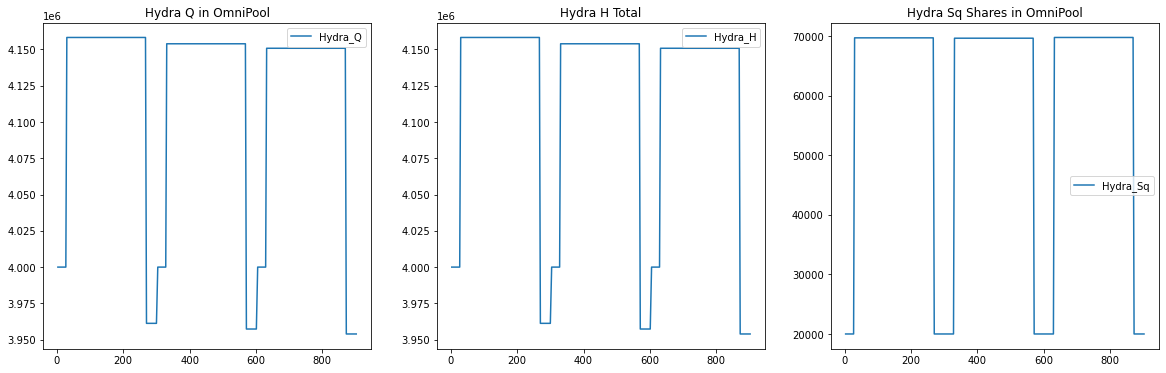

In [9]:
plt.figure(figsize=(20,6))
ax = plt.subplot(131)
hydra.astype(float).plot(ax=ax, y=['Hydra_Q'])
plt.title('Hydra Q in OmniPool')

ax = plt.subplot(132) 
hydra.astype(float).plot(ax=ax, y=['Hydra_H'])
plt.title('Hydra H Total')

ax = plt.subplot(133)
hydra.astype(float).plot(ax=ax, y=['Hydra_Sq'])
plt.title('Hydra Sq Shares in OmniPool')

plt.show()

## Pool variable `Y` 
should change for liquidity events and remain constant under swaps

In [10]:
rdf.Y

3     779585.16
6     779585.16
9     779585.16
12    779585.16
15    779585.16
         ...   
890   787842.11
893   787842.11
896   787842.11
899   787842.11
902   787842.11
Name: Y, Length: 300, dtype: float64

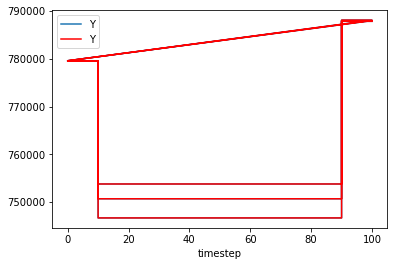

In [11]:
import matplotlib.pyplot as plt
import pandas as pd

# gca stands for 'get current axis'
ax = plt.gca()

df.plot(kind='line',x='timestep',y='Y',ax=ax)
df.plot(kind='line',x='timestep',y='Y', color='red', ax=ax)

plt.show()


# Agents and their Local State Variables

The following section tracks the development for the agent states.
As every agent is defined to be responsible for a different action and all agent states are shown this section can be used to assess 
- the intentional changes in the local states directly affected by the actions, and
- the unintentional changes in local states of other agents who are indirectly affected

All agents carry the following local states:

| Symbol | Name | Definition  | Domain |   | Unit
| -------- | -------- | -------- | -------- | -------- | --------|
| $\mathbf{r}^j$     | Reserve Assets     | Reserve Assets are quantities of privately held risk assets by liquidity provider agent $j$ which are not (yet) related to the Liquidity Pool. |  $\mathbb{R}_{+}^{n}$| | BTC, ETH, DOT,...; an amount in real non-negative numbers denoted in the respective currency unit
| $h^j$     | Base Asset     | Total Base Asset (HDX) amount of $H$ held by agent $j$. |  $\mathbb{R}_{+}$| | a real non-negative amount of HDX |
| $\mathbf{s}^j$     | Risk Asset Shares     | Risk Asset Share as value of liquidity provider agent $j$'s contribution of risk asset(s) to the Liquidity Pool, minted and distributed (as a claim) to agent $j$ at the time of introduction into the Pool.| $\mathbb{R}_{+}^{n}$  | |a vector of amounts in real non-negative numbers
| $s^{qj}$     | Base Asset Share     | Base Asset (HDX) share as value of liquidity provider agent $j$'s contribution of HDX to the Liquidity Pool,  minted and distributed to agent $j$ (as a claim) at the time of introduction into the Pool.| $\mathbb{R}_{+}$  | |a real non-negative number

To locate specific values in the dataframe the commands
- `first_valid_index()`
- `first_valid_index()*x`
- `last_valid_index()`

can be used.


## Hydra World

Results for the copy of the agents going through the Hydra world are saved in `hydra_agents`


In [12]:
rdf['hydra_agents'][rdf.first_valid_index()]

,m,r_i_out,r_i_in,h,q_i,s_i,s_q,r_j_out,r_j_in,q_j,s_j
0,0,100000.00,110000.00,140000.00,170000.00,150000.00,0.00,120000.00,130000.00,180000.00,160000.00
1,1,100000.00,110000.00,140000.00,170000.00,150000.00,0.00,120000.00,130000.00,180000.00,160000.00
2,2,100000.00,110000.00,140000.00,170000.00,0.00,0.00,120000.00,130000.00,180000.00,160000.00
3,3,100000.00,110000.00,140000.00,170000.00,150000.00,0.00,120000.00,130000.00,180000.00,160000.00
4,4,100000.00,110000.00,140000.00,170000.00,150000.00,0.00,120000.00,130000.00,180000.00,160000.00
5,5,99000.00,110000.00,140000.00,170000.00,150000.00,0.00,123962.32,130000.00,180000.00,160000.00
6,6,1000.00,0.00,10.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
7,7,1000.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [13]:
rdf['hydra_agents'][rdf.first_valid_index()*12]

,m,r_i_out,r_i_in,h,q_i,s_i,s_q,r_j_out,r_j_in,q_j,s_j
0,0,100000.00,110000.00,140000.00,170000.00,150000.00,0.00,120000.00,130000.00,180000.00,160000.00
1,1,100000.00,110000.00,140000.00,170000.00,150000.00,0.00,120000.00,130000.00,180000.00,160000.00
2,2,50000.00,160000.00,140000.00,170000.00,49739.62,0.00,120000.00,130000.00,180000.00,160000.00
3,3,100000.00,110000.00,140000.00,170000.00,150000.00,0.00,120000.00,130000.00,180000.00,160000.00
4,4,100000.00,110000.00,140000.00,170000.00,150000.00,0.00,120000.00,130000.00,180000.00,160000.00
5,5,95291.48,110000.00,140000.00,170000.00,150000.00,0.00,138336.38,130000.00,180000.00,160000.00
6,6,1000.00,0.00,10.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
7,7,1000.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [14]:
rdf['hydra_agents'][rdf.last_valid_index()]

,m,r_i_out,r_i_in,h,q_i,s_i,s_q,r_j_out,r_j_in,q_j,s_j
0,0,100000.00,110000.00,140000.00,170000.00,150000.00,0.00,120000.00,130000.00,180000.00,160000.00
1,1,100000.00,110000.00,140000.00,170000.00,150000.00,0.00,120000.00,130000.00,180000.00,160000.00
2,2,100820.74,109179.26,140000.00,170000.00,0.00,0.00,120000.00,130000.00,180000.00,160000.00
3,3,100000.00,110000.00,140000.00,170000.00,150000.00,0.00,120000.00,130000.00,180000.00,160000.00
4,4,100000.00,110000.00,140000.00,170000.00,150000.00,0.00,120000.00,130000.00,180000.00,160000.00
5,5,73977.98,110000.00,140000.00,170000.00,150000.00,0.00,211269.56,130000.00,180000.00,160000.00
6,6,1000.00,0.00,10.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
7,7,1000.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


## Agent Token Holdings - Hydra World

The following command line creates eight plots, one for each agents indivudially, showing his token holdings


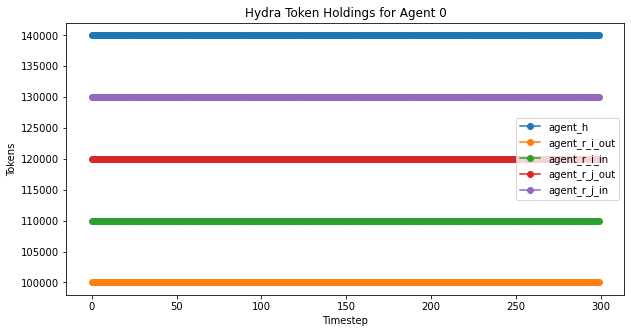

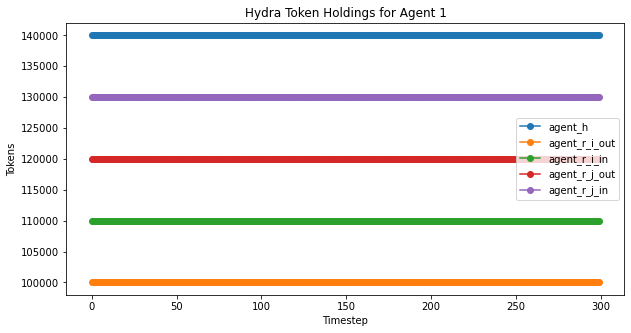

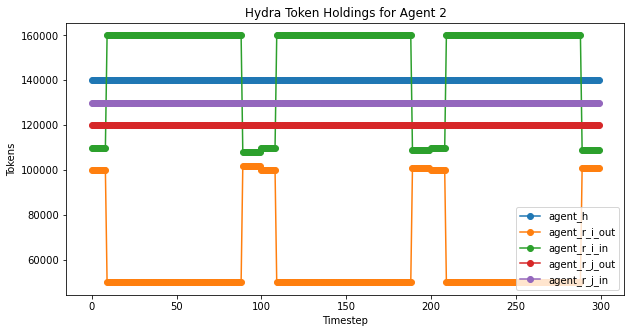

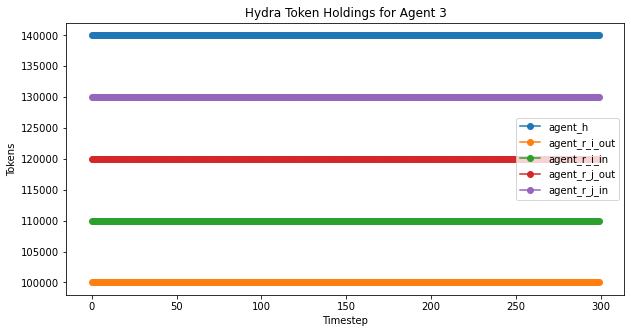

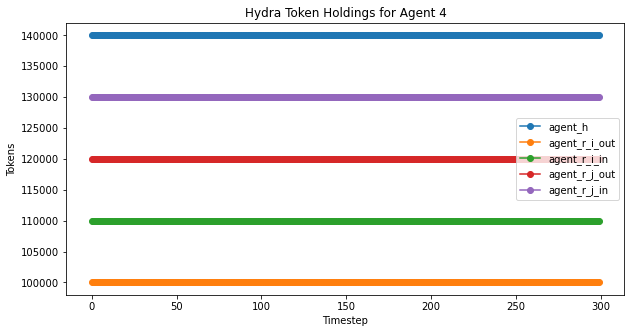

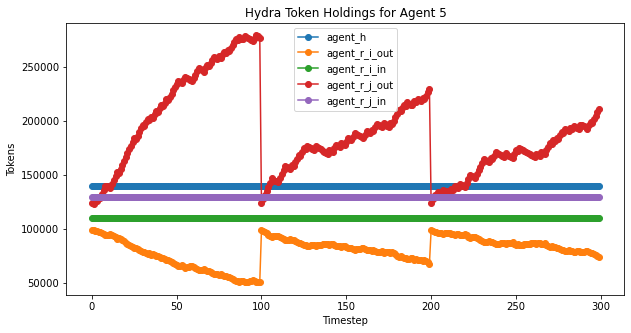

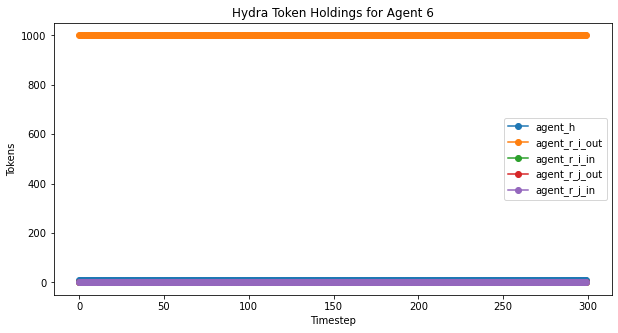

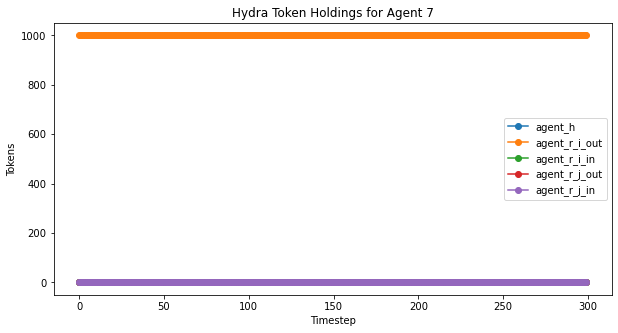

In [15]:
hydra_agent_plot(rdf,'Hydra Token Holdings for Agent ', len(rdf['timestep']))

## Agent Values - Hydra World

The following command line creates eight plots, one for each agents showing his values. These are the token holdings multiplied by price.


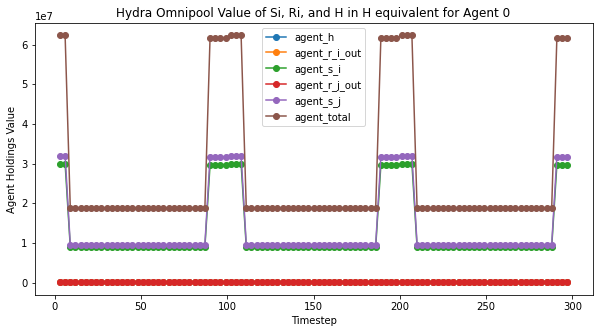

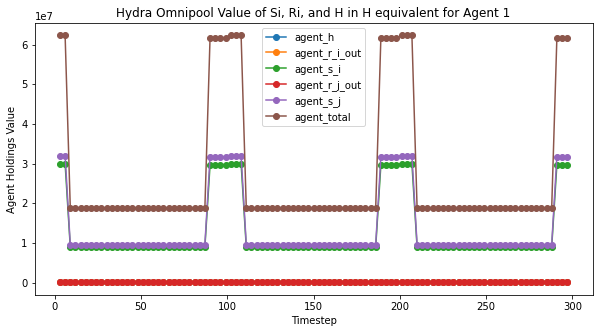

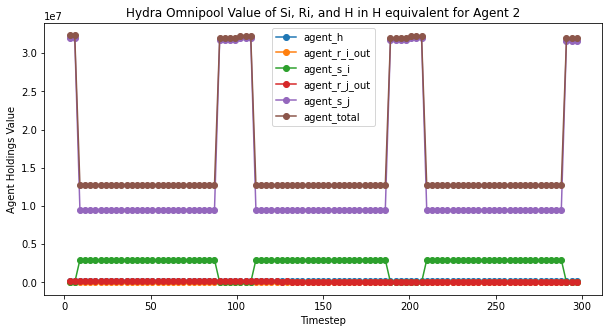

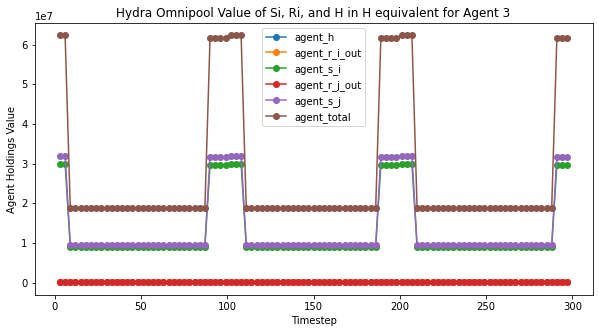

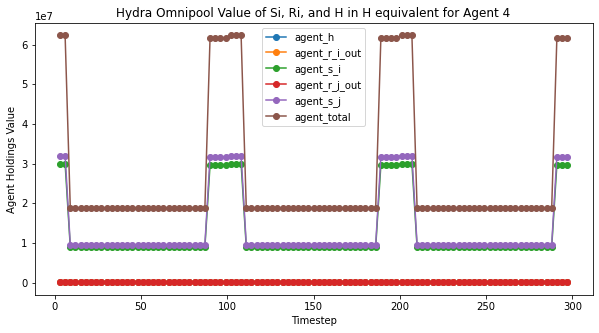

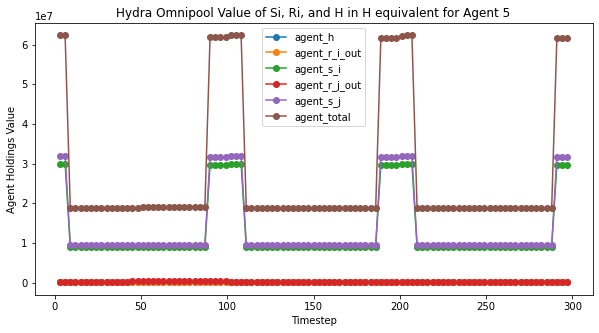

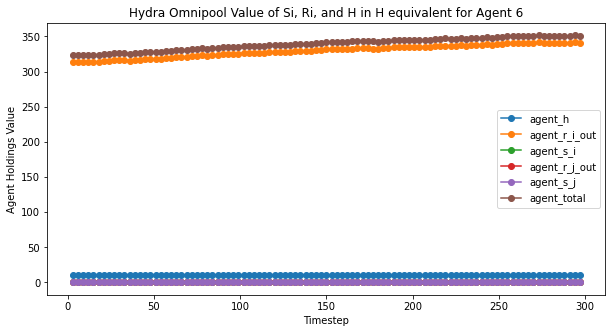

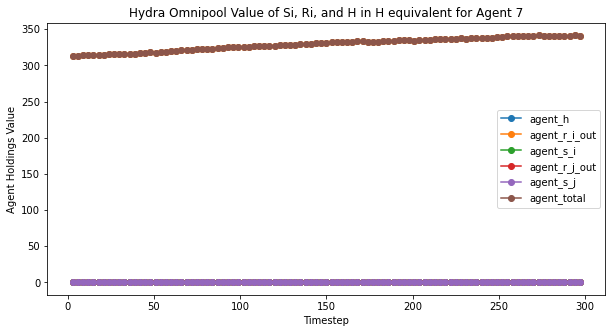

In [16]:
hydra_agent_value_plot(rdf,'Hydra Omnipool Value of Si, Ri, and H in H equivalent', len(rdf['timestep'])) #,2, 'i')

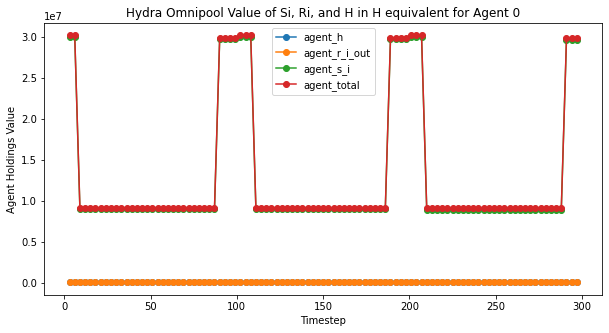

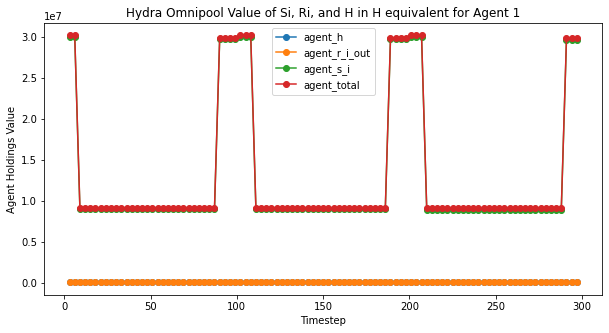

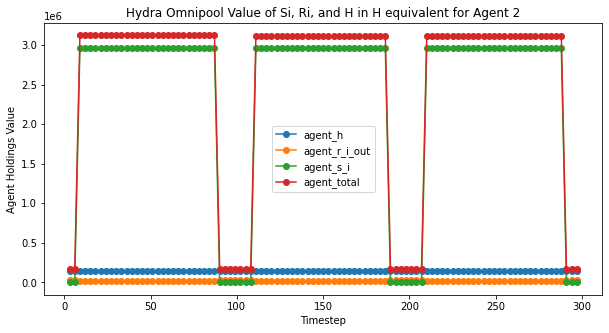

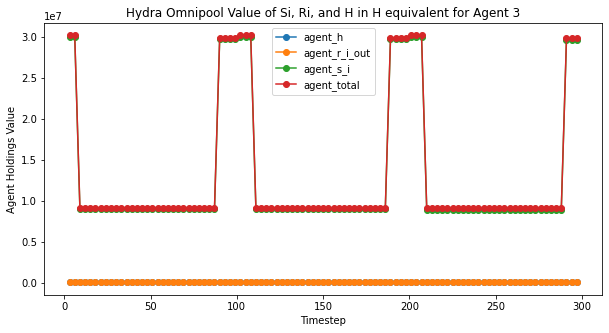

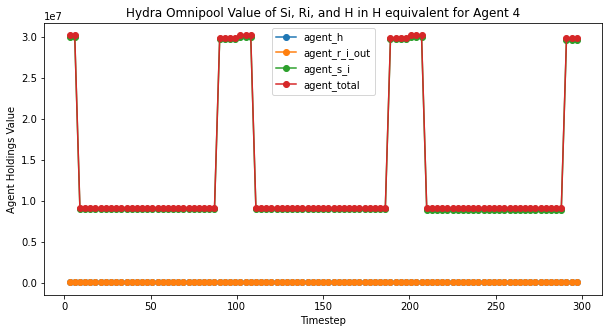

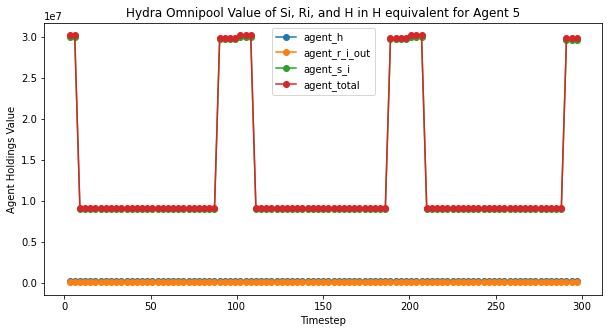

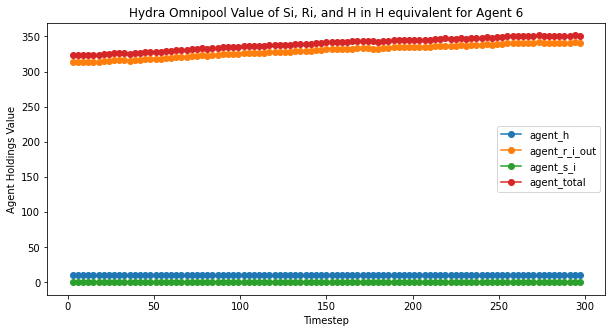

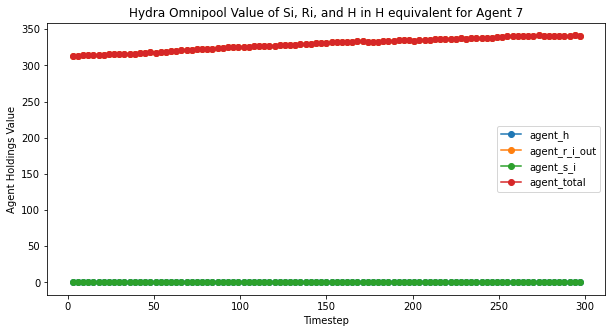

In [17]:
hydra_agent_value_plot_rev(rdf,'Hydra Omnipool Value of Si, Ri, and H in H equivalent', len(rdf['timestep'])) #,2, 'i')